In [1]:
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
from ste import STE
import matplotlib.pyplot as plt

In [2]:
# Set default setting for the figures.
plt.style.use("default") # style matplotlib
plt.rc("axes", labelsize = 12) # fontsize of the x and y labels
plt.rc("axes", titlesize = 15) # fontsize of the axes title
plt.rc("xtick", labelsize = 12) # fontsize of the tick labels
plt.rc("ytick", labelsize = 12) # fontsize of the tick labels
plt.rc("legend", fontsize = 12) # legend fontsize

In [3]:
# Add the python path to the folder containing some custom packages.
import sys
sys.path.insert(0, "../packages/")
from TsIP.TsIP import TsIP

# Time-series dataset

In [4]:
# Define the country name.
COUNTRY = "Burkina Faso"

In [5]:
# Load the time-series.
df = pd.read_csv(f"../Dataset time-series/output_data/{COUNTRY}/{COUNTRY}-day.csv", header = [0, 1], index_col = 0)
# Not consider some indicators.
df.drop(["Code", "Lat", "Lon", "Ramadan", "Population"], axis = 1, level = "Indicator", inplace = True)
df.index.name = "Datetime"
df.index = pd.to_datetime(df.index)
freq = "D"
df.index.freq = freq
df.head()

AdminStrata             Boucle-Du-Mouhoun                                 \
Indicator   1 Month Anomaly Rainfalls (%) 3 Months Anomaly Rainfalls (%)   
Datetime                                                                   
2019-09-08                     104.747834                     106.271378   
2019-09-09                     104.800365                     106.240116   
2019-09-10                     104.881777                     106.220459   
2019-09-11                     104.988996                     106.210471   
2019-09-12                     105.122024                     106.210151   

AdminStrata                                                           \
Indicator   Exchange rate      FCG Fatalities      NDVI NDVI Anomaly   
Datetime                                                               
2019-09-08       0.796155  30.9217        4.0  0.496905    95.011603   
2019-09-09       0.799253  31.1039        4.0  0.500725    95.044700   
2019-09-10       0.802352  32.0303        4.0  0.504537    95.083381   
2019-09-11       0.805451  32.1673        4.0  0.508317    95.128519   
2019-09-12       0.808549  31.7701        4.0  0.512066    95.180114   

AdminStrata                                                   ...  \
Indicator   Price cereals and tubers Rainfalls (mm)     rCSI  ...   
Datetime                                                      ...   
2019-09-08                  0.077833       424.5106  19.4995  ...   
2019-09-09                  0.078059       426.2755  19.5674  ...   
2019-09-10                  0.078284       428.0404  20.4007  ...   
2019-09-11                  0.078509       428.2382  20.4056  ...   
2019-09-12                  0.078734       428.4360  19.2385  ...   

AdminStrata                     Sud-Ouest                                 \
Indicator   1 Month Anomaly Rainfalls (%) 3 Months Anomaly Rainfalls (%)   
Datetime                                                                   
2019-09-08                     117.742597                     117.518080   
2019-09-09                     117.536886                     117.497259   
2019-09-10                     117.317641                     117.473018   
2019-09-11                     117.088827                     117.445525   
2019-09-12                     116.850446                     117.414779   

AdminStrata                                                           \
Indicator   Exchange rate      FCG Fatalities      NDVI NDVI Anomaly   
Datetime                                                               
2019-09-08       0.796155  36.2381        0.0  0.659100   100.496780   
2019-09-09       0.799253  35.8286        0.0  0.660844   100.491038   
2019-09-10       0.802352  36.2542        0.0  0.662560   100.485497   
2019-09-11       0.805451  35.8838        0.0  0.664241   100.480693   
2019-09-12       0.808549  34.9950        0.0  0.665889   100.476627   

AdminStrata                                                   
Indicator   Price cereals and tubers Rainfalls (mm)     rCSI  
Datetime                                                      
2019-09-08                  0.295372       465.6788  17.7619  
2019-09-09                  0.294013       467.8467  17.5612  
2019-09-10                  0.292654       470.0146  17.8142  
2019-09-11                  0.291296       471.5916  17.3366  
2019-09-12                  0.289937       473.1686  17.2483  

[5 rows x 130 columns]

In [6]:
len(df)

481

In [7]:
PROVINCES = df.columns.get_level_values("AdminStrata").unique()
PROVINCES

Index(['Boucle-Du-Mouhoun', 'Cascades', 'Centre', 'Centre-Est', 'Centre-Nord',
       'Centre-Ouest', 'Centre-Sud', 'Est', 'Hauts-Bassins', 'Nord',
       'Plateau-Central', 'Sahel', 'Sud-Ouest'],
      dtype='object', name='AdminStrata')

In [8]:
INDICATORS = df.columns.get_level_values("Indicator").unique()
INDICATORS

Index(['1 Month Anomaly Rainfalls (%)', '3 Months Anomaly Rainfalls (%)',
       'Exchange rate', 'FCG', 'Fatalities', 'NDVI', 'NDVI Anomaly',
       'Price cereals and tubers', 'Rainfalls (mm)', 'rCSI'],
      dtype='object', name='Indicator')

In [9]:
#TsIP(df).interactive_plot_df(title = "Time-series", matplotlib = False, style = "lines", comparison = False, normalization = True)

In [10]:
# Assign a color to each indicator.
cols = [(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
        (1.0, 0.4980392156862745, 0.054901960784313725),
        (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
        (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
        (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
        (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
        (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
        (0.09019607843137255, 0.7450980392156863, 0.8117647058823529), 
        (1.0, 1.0, 0.2), 
        (0.6941176470588235, 0.34901960784313724, 0.1568627450980392)]

colors = dict()
for i,indicator in enumerate(reversed(INDICATORS)):
    colors[indicator] = cols[i]

## Compute the STE

In [11]:
np.random.seed(123)

max_deltas = 15

def compute_STE(serie):
    adminstrata, indicator = serie.name
    x = serie.values.ravel().copy()
    y = df[adminstrata]["FCG"].values.ravel().copy()
    
    deltas = list()
    for delta in range(max_deltas):
        # Compute STE.
        original_STE = STE.calc_ste(x, y, m = 3, h = delta+1) 
        # Compute value of STE from X (shuffled 50 times) to Y.
        shuffle_STE = list()
        for i in range(30):
            x_shuffle = x.copy()
            np.random.shuffle(x_shuffle)
            shuffle_STE.append(STE.calc_ste(x_shuffle, y, m = 3, h = delta+1))  
        shuffle_STE = np.mean(shuffle_STE)
        # Compute effective STE.
        effective_STE = original_STE - shuffle_STE
        # Compute relative explanation added.
        REA = (original_STE - shuffle_STE) / STE.entropy_rate(y, m = 3, h = delta+1)
        # Append results.
        deltas.append([original_STE, shuffle_STE, effective_STE, REA])
        
    deltas = pd.DataFrame(deltas, columns = ["original_STE", "shuffle_STE", "effective_STE", "REA"]) 
    deltas.index = deltas.index + 1   
    deltas.index.name = "Delta"
    return deltas 

tqdm.pandas()
df_STE_deltas = df.groupby(axis = 1, level = ["AdminStrata", "Indicator"]).progress_apply(compute_STE)
df_STE_deltas.drop("FCG", axis = 1, level = "Indicator", inplace = True)
df_STE_deltas.head()

AdminStrata             Boucle-Du-Mouhoun                                      \
Indicator   1 Month Anomaly Rainfalls (%)                                       
                             original_STE shuffle_STE effective_STE       REA   
Delta                                                                           
1                                0.061577    0.103825     -0.042248 -0.032282   
2                                0.106859    0.244328     -0.137470 -0.061092   
3                                0.108168    0.252139     -0.143971 -0.064317   
4                                0.082955    0.246657     -0.163702 -0.072866   
5                                0.099896    0.251828     -0.151932 -0.066524   

AdminStrata                                                           \
Indicator   3 Months Anomaly Rainfalls (%)                             
                              original_STE shuffle_STE effective_STE   
Delta                                                                  
1                                 0.050284    0.100311     -0.050028   
2                                 0.094465    0.245686     -0.151220   
3                                 0.115143    0.250577     -0.135434   
4                                 0.110635    0.248865     -0.138230   
5                                 0.092981    0.245614     -0.152633   

AdminStrata                                      ...                Sud-Ouest  \
Indicator             Exchange rate              ... Price cereals and tubers   
                  REA  original_STE shuffle_STE  ...            effective_STE   
Delta                                            ...                            
1           -0.038226      0.049454    0.098801  ...                -0.059803   
2           -0.067202      0.084991    0.252321  ...                -0.154141   
3           -0.060504      0.073935    0.251709  ...                -0.128635   
4           -0.061528      0.076112    0.245163  ...                -0.146454   
5           -0.066831      0.102545    0.258380  ...                -0.162819   

AdminStrata                                                               \
Indicator             Rainfalls (mm)                                       
                  REA   original_STE shuffle_STE effective_STE       REA   
Delta                                                                      
1           -0.042666       0.039746    0.103580     -0.063833 -0.045541   
2           -0.064827       0.098218    0.264230     -0.166012 -0.069819   
3           -0.054176       0.090155    0.263118     -0.172963 -0.072845   
4           -0.061589       0.101107    0.271107     -0.170000 -0.071491   
5           -0.069041       0.088998    0.260151     -0.171153 -0.072575   

AdminStrata                                                   
Indicator           rCSI                                      
            original_STE shuffle_STE effective_STE       REA  
Delta                                                         
1               0.105834    0.105777      0.000057  0.000041  
2               0.298469    0.259062      0.039406  0.016573  
3               0.222059    0.257629     -0.035570 -0.014981  
4               0.197034    0.265316     -0.068282 -0.028715  
5               0.209091    0.270837     -0.061745 -0.026182  

[5 rows x 468 columns]

In [12]:
#df_STE_deltas.to_csv("STE.csv")

#df_STE_deltas = pd.read_csv("STE.csv", index_col = 0, header = [0, 1, 2])
df_STE_deltas.head()

AdminStrata             Boucle-Du-Mouhoun                                      \
Indicator   1 Month Anomaly Rainfalls (%)                                       
                             original_STE shuffle_STE effective_STE       REA   
Delta                                                                           
1                                0.061577    0.103825     -0.042248 -0.032282   
2                                0.106859    0.244328     -0.137470 -0.061092   
3                                0.108168    0.252139     -0.143971 -0.064317   
4                                0.082955    0.246657     -0.163702 -0.072866   
5                                0.099896    0.251828     -0.151932 -0.066524   

AdminStrata                                                           \
Indicator   3 Months Anomaly Rainfalls (%)                             
                              original_STE shuffle_STE effective_STE   
Delta                                                                  
1                                 0.050284    0.100311     -0.050028   
2                                 0.094465    0.245686     -0.151220   
3                                 0.115143    0.250577     -0.135434   
4                                 0.110635    0.248865     -0.138230   
5                                 0.092981    0.245614     -0.152633   

AdminStrata                                      ...                Sud-Ouest  \
Indicator             Exchange rate              ... Price cereals and tubers   
                  REA  original_STE shuffle_STE  ...            effective_STE   
Delta                                            ...                            
1           -0.038226      0.049454    0.098801  ...                -0.059803   
2           -0.067202      0.084991    0.252321  ...                -0.154141   
3           -0.060504      0.073935    0.251709  ...                -0.128635   
4           -0.061528      0.076112    0.245163  ...                -0.146454   
5           -0.066831      0.102545    0.258380  ...                -0.162819   

AdminStrata                                                               \
Indicator             Rainfalls (mm)                                       
                  REA   original_STE shuffle_STE effective_STE       REA   
Delta                                                                      
1           -0.042666       0.039746    0.103580     -0.063833 -0.045541   
2           -0.064827       0.098218    0.264230     -0.166012 -0.069819   
3           -0.054176       0.090155    0.263118     -0.172963 -0.072845   
4           -0.061589       0.101107    0.271107     -0.170000 -0.071491   
5           -0.069041       0.088998    0.260151     -0.171153 -0.072575   

AdminStrata                                                   
Indicator           rCSI                                      
            original_STE shuffle_STE effective_STE       REA  
Delta                                                         
1               0.105834    0.105777      0.000057  0.000041  
2               0.298469    0.259062      0.039406  0.016573  
3               0.222059    0.257629     -0.035570 -0.014981  
4               0.197034    0.265316     -0.068282 -0.028715  
5               0.209091    0.270837     -0.061745 -0.026182  

[5 rows x 468 columns]

In [13]:
def compute_importance(x):
    idx = x.xs("REA", axis = 1, level = 2).idxmax()
    return x.xs("REA", axis = 1, level = 2).loc[idx].values.ravel()[0]
    
T_fcs = df_STE_deltas.groupby(axis = 1, level = ["AdminStrata", "Indicator"], group_keys = False).apply(compute_importance).unstack("Indicator")

In [14]:
T_fcs_perc = T_fcs*100
T_fcs_perc[T_fcs_perc < 0] = 0

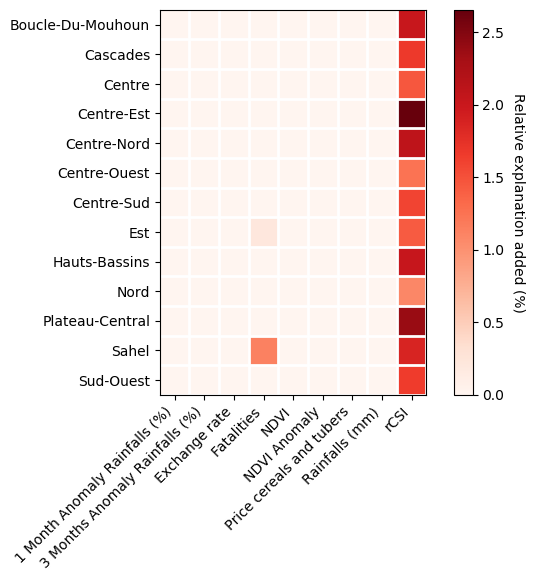

In [15]:
fig, ax = plt.subplots(figsize = (7, 5))
im = ax.imshow(T_fcs_perc, cmap = "Reds")
cbar = fig.colorbar(im, ax = ax)
cbar.set_label("Relative explanation added (%)", rotation = 270, labelpad = 15)

ax.set_xticks(range(len(T_fcs_perc.columns)))
ax.set_yticks(range(len(T_fcs_perc.index)))
ax.set_xticklabels(T_fcs.columns, rotation = 45)
ax.set_yticklabels(T_fcs.index)

for i in range(T_fcs_perc.shape[0]):
    ax.axhline(i + 0.5, color = "white", lw = 2)
for i in range(T_fcs_perc.shape[1]):
    ax.axvline(i + 0.5, color = "white", lw = 2)

plt.xticks(rotation = 45, ha = "right");

# Save the figure.
fig.savefig(f"./output_images/Importance_{COUNTRY}.png", bbox_inches = "tight", dpi = 300)

## Example

In [16]:
def compute_best_delta(x):
    idx = x.xs("REA", axis = 1, level = 2).idxmax().values[0]
    return idx
    
best_delta = df_STE_deltas.groupby(axis = 1, level = ["AdminStrata", "Indicator"], group_keys = False).apply(compute_best_delta).unstack("Indicator")

In [17]:
best_delta.median()

Indicator
1 Month Anomaly Rainfalls (%)     1.0
3 Months Anomaly Rainfalls (%)    1.0
Exchange rate                     1.0
Fatalities                        1.0
NDVI                              1.0
NDVI Anomaly                      1.0
Price cereals and tubers          1.0
Rainfalls (mm)                    1.0
rCSI                              7.0
dtype: float64

In [18]:
best_delta.median().to_csv(f"./output_deltas/best_deltas_{COUNTRY}.txt", sep = "\t")

In [19]:
T_fcs_rank = T_fcs.transpose().rank(method = "max", ascending = False).transpose()
T_fcs_rank.head()

Indicator,1 Month Anomaly Rainfalls (%),3 Months Anomaly Rainfalls (%),Exchange rate,Fatalities,NDVI,NDVI Anomaly,Price cereals and tubers,Rainfalls (mm),rCSI
AdminStrata,,,,,,,,,
Boucle-Du-Mouhoun,3.0,5.0,4.0,6.0,9.0,2.0,7.0,8.0,1.0
Cascades,5.0,2.0,7.0,9.0,8.0,3.0,6.0,4.0,1.0
Centre,3.0,2.0,7.0,9.0,8.0,6.0,5.0,4.0,1.0
Centre-Est,3.0,4.0,2.0,8.0,7.0,9.0,5.0,6.0,1.0
Centre-Nord,9.0,4.0,3.0,2.0,7.0,5.0,6.0,8.0,1.0


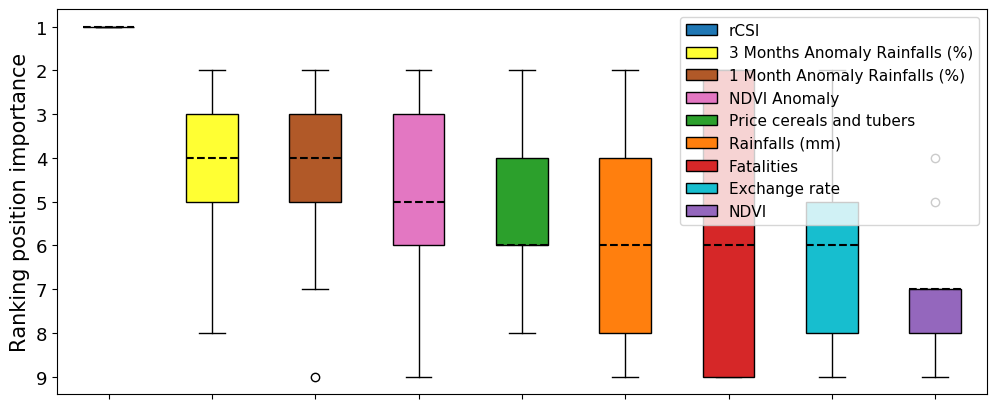

In [20]:
fig, ax = plt.subplots(figsize = (12, 5))
T_fcs_rank = T_fcs_rank.astype(int)
meds = T_fcs_rank.mean()
meds.sort_values(ascending = True, inplace = True)
T_fcs_rank_sort = T_fcs_rank[meds.index]

bplot = ax.boxplot(T_fcs_rank_sort.T, patch_artist = True, medianprops = {"linestyle": "--", "linewidth": 1.5, "color": "black"}) 
# Fill with colors.
legends = list()
for patch, indicator in zip(bplot["boxes"], T_fcs_rank_sort.columns):
    patch.set_facecolor(colors[indicator])
    patch.set_label(indicator)
    legends.append(patch)

ax.invert_yaxis()
#ax.set_xlabel("Indicator")
ax.set_ylabel("Ranking position importance", fontsize = 15)
ax.tick_params(labelsize = 13)
ax.set_xticklabels([""]*len(T_fcs_rank_sort.columns), rotation = 0, fontsize = 15)  

ax.legend(legends, T_fcs_rank_sort.columns, loc = "upper right", prop = {"size": 11})

# Save the figure.
fig.savefig(f"./output_images/Ranking_{COUNTRY}.png", bbox_inches = "tight", dpi = 300)